<a href="https://colab.research.google.com/github/varsha595/QUANTUM-COMPUTING-PROJECT/blob/main/3qubit_grover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.3 MB/s eta 0:00:00
✅ Installation complete! Running Grover's algorithm (3 qubits)...



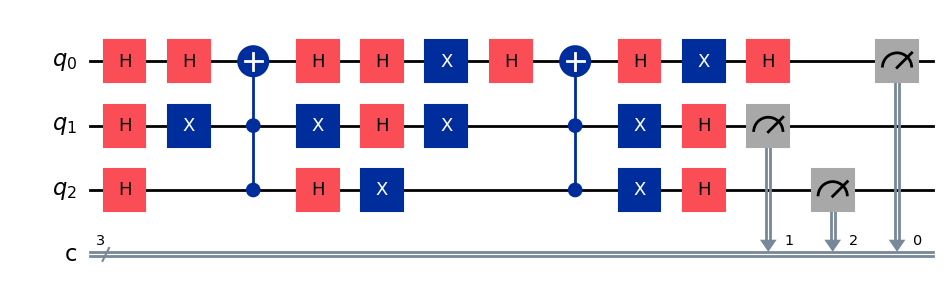

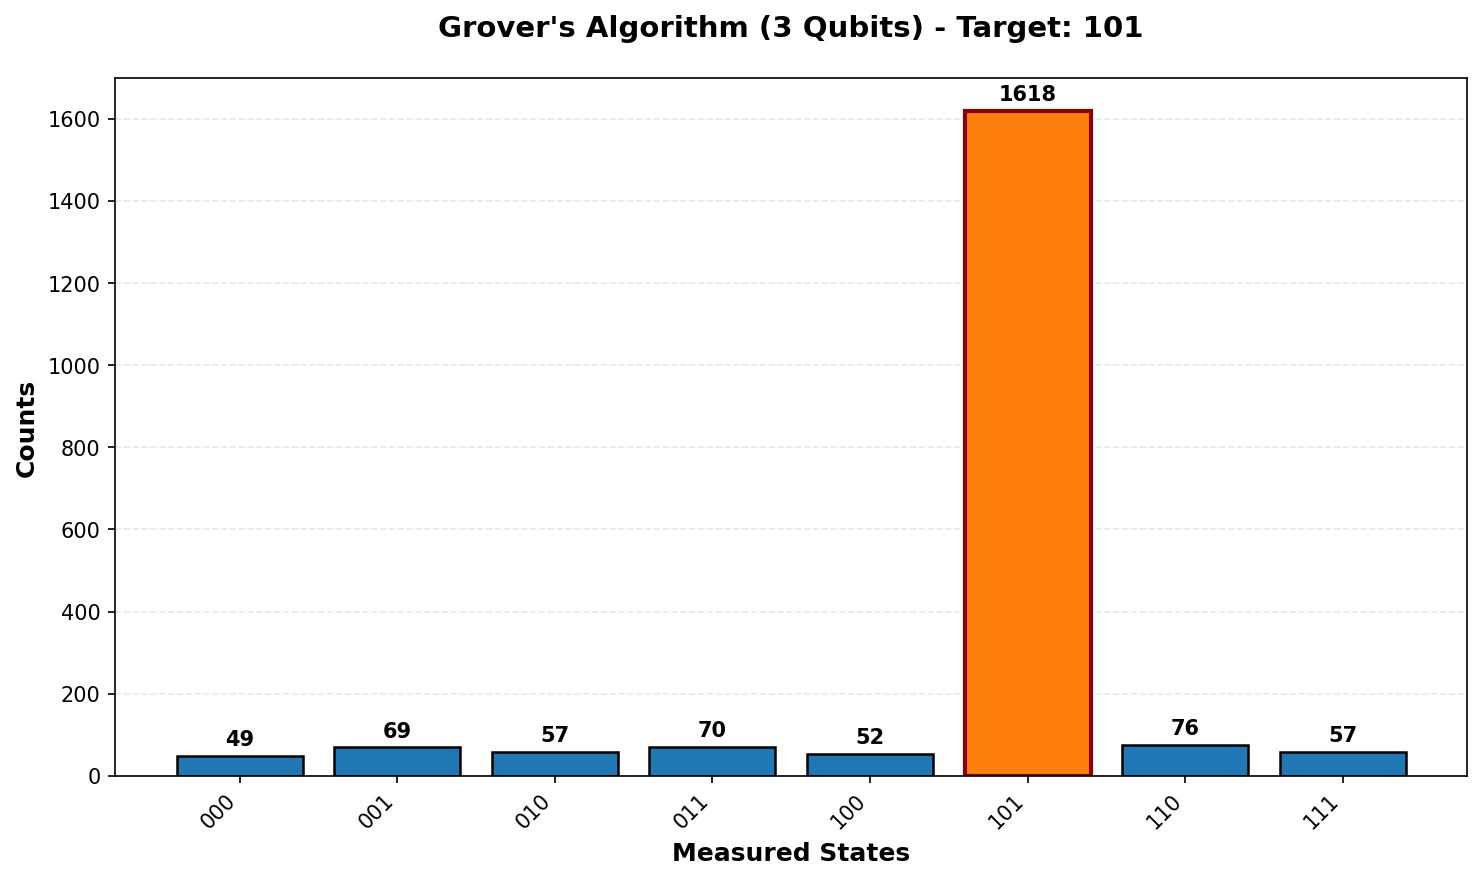


TARGET STATE: 101

Measurement Results:
  000:   49 ( 2.39%)
  001:   69 ( 3.37%)
  010:   57 ( 2.78%)
  011:   70 ( 3.42%)
  100:   52 ( 2.54%)
  101: 1618 (79.00%) ← TARGET
  110:   76 ( 3.71%)
  111:   57 ( 2.78%)

Total shots: 2048
Success probability: 79.00%



In [ ]:

!pip install -U qiskit qiskit-aer matplotlib pylatexenc --quiet

print("✅ Installation complete! Running Grover's algorithm (3 qubits)...\n")


from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from IPython.display import Image, display


def grover_3_qubit(target='101'):
    qc = QuantumCircuit(3, 3)

    # Step 1: Superposition
    qc.h(range(3))

    # Step 2: Oracle (mark target state)
    for i, bit in enumerate(target):
        if bit == '0':
            qc.x(i)

    qc.h(2)
    qc.ccx(0, 1, 2)  # Toffoli gate (controls = 0,1; target = 2)
    qc.h(2)

    for i, bit in enumerate(target):
        if bit == '0':
            qc.x(i)

    # Step 3: Diffusion operator (inversion about mean)
    qc.h(range(3))
    qc.x(range(3))
    qc.h(2)
    qc.ccx(0, 1, 2)
    qc.h(2)
    qc.x(range(3))
    qc.h(range(3))
    qc = qc.reverse_bits()
    qc.measure(range(3), range(3))

    return qc



target_state = '101'
qc = grover_3_qubit(target_state)


circuit_path = "/content/grover3_circuit.png"
qc.draw('mpl').savefig(circuit_path, bbox_inches='tight')
display(Image(circuit_path))

#  Simulate
sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled, shots=2048).result()
counts = result.get_counts()


fig, ax = plt.subplots(figsize=(10, 6))


sorted_counts = dict(sorted(counts.items()))


states = list(sorted_counts.keys())
values = list(sorted_counts.values())
bars = ax.bar(states, values, color='#1f77b4', edgecolor='black', linewidth=1.2)
target_index = states.index(target_state) if target_state in states else -1
if target_index >= 0:
    bars[target_index].set_color('#ff7f0e')
    bars[target_index].set_edgecolor('darkred')
    bars[target_index].set_linewidth(2)

ax.set_xlabel('Measured States', fontsize=12, fontweight='bold')
ax.set_ylabel('Counts', fontsize=12, fontweight='bold')
ax.set_title(f'Grover\'s Algorithm (3 Qubits) - Target: {target_state}',
             fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)


plt.xticks(rotation=45, ha='right')


for i, (state, count) in enumerate(zip(states, values)):
    ax.text(i, count + max(values)*0.01, str(count),
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()


hist_path = "/content/grover3_histogram.png"
plt.savefig(hist_path, dpi=150, bbox_inches='tight')
display(Image(hist_path))
plt.close()


print(f"\n{'='*50}")
print(f"TARGET STATE: {target_state}")
print(f"{'='*50}")
print(f"\nMeasurement Results:")
for state, count in sorted_counts.items():
    percentage = (count / 2048) * 100
    marker = " ← TARGET" if state == target_state else ""
    print(f"  {state}: {count:4d} ({percentage:5.2f}%){marker}")
print(f"\n{'='*50}")
print(f"Total shots: 2048")
print(f"Success probability: {counts.get(target_state, 0)/2048*100:.2f}%")
print(f"{'='*50}\n")